# 8.2 scikit-learn中的多项式回归和Pipeline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3,3,size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

## 8.2.1 PolynonialFeature 为数据新增特征数
    - 通过degree设置多项式的最大的次数

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [5]:
X2.shape

(100, 3)

In [6]:
X2[:5,:]

array([[ 1.00000000e+00,  2.40093832e+00,  5.76450484e+00],
       [ 1.00000000e+00,  2.34803306e+00,  5.51325925e+00],
       [ 1.00000000e+00, -7.42872634e-02,  5.51859750e-03],
       [ 1.00000000e+00,  1.59303407e+00,  2.53775755e+00],
       [ 1.00000000e+00, -2.19277423e+00,  4.80825884e+00]])

In [7]:
X[:5,:]

array([[ 2.40093832],
       [ 2.34803306],
       [-0.07428726],
       [ 1.59303407],
       [-2.19277423]])

## 8.2.2 PolynonialFeature增加特征后，使用线性回归来拟合

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

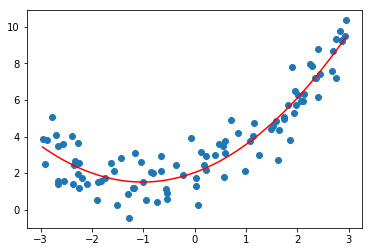

In [9]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [10]:
# 第一列所有的数据拟合的参数为0
lin_reg2.coef_

array([0.        , 1.0250051 , 0.50543555])

In [11]:
lin_reg2.intercept_

2.0284376416394965

## 8.2.3 关于PolynonialFeature的探究

In [12]:
X = np.arange(1, 11).reshape(-1,2)

In [13]:
# 最初的X设置为2列的数据
X.shape

(5, 2)

In [14]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [15]:
# 转换为最大为二次幂的数据
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [16]:
# 转换的结果为最大为二次幂的数据
# 1  x1  x2  x1^2  x1x2  x2^2
X2.shape

(5, 6)

In [17]:
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

In [18]:
# 转换为最大为二次幂的数据
poly = PolynomialFeatures(degree=3)
poly.fit(X)
X3 = poly.transform(X)

In [19]:
# 转换的结果为最大为二次幂的数据

X3.shape 

(5, 10)

In [20]:
X3

array([[   1.,    1.,    2.,    1.,    2.,    4.,    1.,    2.,    4.,
           8.],
       [   1.,    3.,    4.,    9.,   12.,   16.,   27.,   36.,   48.,
          64.],
       [   1.,    5.,    6.,   25.,   30.,   36.,  125.,  150.,  180.,
         216.],
       [   1.,    7.,    8.,   49.,   56.,   64.,  343.,  392.,  448.,
         512.],
       [   1.,    9.,   10.,   81.,   90.,  100.,  729.,  810.,  900.,
        1000.]])

## 8.2.4 Pipeline
    - 重复的三步，写进一个pipeline中
        - PolynomialFeatures
        - Standardization
        - LinearRegression

In [21]:
x = np.random.uniform(-3,3,size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [23]:
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

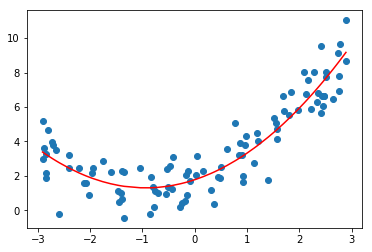

In [24]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()